In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
#nltk.download('stopwords')

In [35]:
#Read the data file
rev = pd.read_csv("C:/Users/USER/Desktop/Course_Data_Scientist_Springboard/1Project_E-commerce/Womens Clothing E-Commerce Reviews.csv", index_col=0)

Here I tink that it's better clean the data 

In [36]:
#Find the length of characters of review text. This also includes spaces
rev['char_length_RT'] = rev['Review Text'].map(str).apply(len)
print (rev.head())

   Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2    

In [37]:
rev.tail(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,char_length_RT
23476,522,27,Cheeky!,These bottoms are very cute but defiantly chee...,4,1,0,Initmates,Intimate,Swim,112
23477,1094,39,Entrancing,I'm so impressed with the beautiful color comb...,4,1,5,General Petite,Dresses,Dresses,500
23478,1104,32,Unflattering,I was surprised at the positive reviews for th...,1,0,0,General Petite,Dresses,Dresses,229
23479,1005,42,What a fun piece!,So i wasn't sure about ordering this skirt bec...,5,1,0,General Petite,Bottoms,Skirts,500
23480,862,35,NaN,NaN,5,1,0,General Petite,Tops,Knits,3
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,131
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,223
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,208
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,427
23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses,110


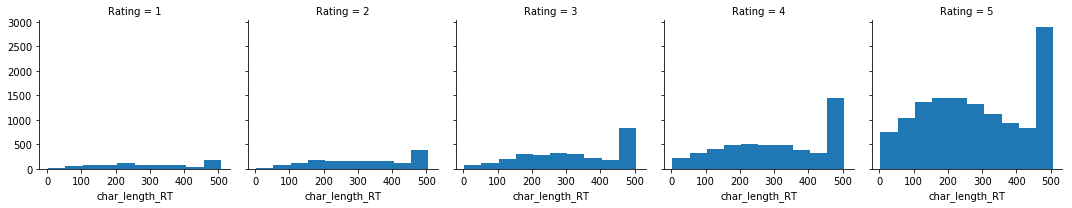

In [38]:
g = sns.FacetGrid(rev, col="Rating")
g.map(plt.hist, 'char_length_RT')

In [39]:
#Number of word of the Review Text
rev['word_count_RT'] = rev['Review Text'].apply(lambda x: len(str(x).split(" ")))
rev[['Review Text','word_count_RT']].head()

,Review Text,word_count_RT
0,Absolutely wonderful - silky and sexy and comf...,8
1,Love this dress! it's sooo pretty. i happene...,67
2,I had such high hopes for this dress and reall...,98
3,"I love, love, love this jumpsuit. it's fun, fl...",22
4,This shirt is very flattering to all due to th...,36


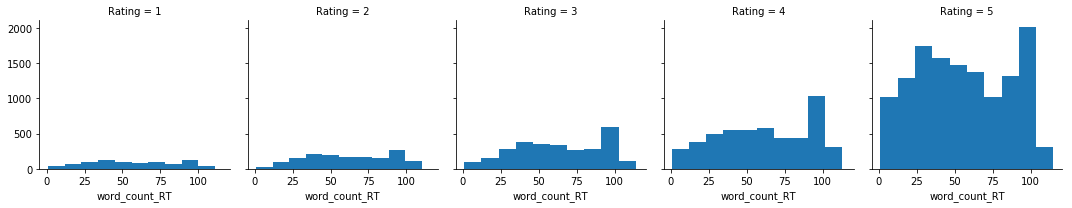

In [40]:
g = sns.FacetGrid(rev, col="Rating")
g.map(plt.hist, "word_count_RT")

In [41]:
#Filter out data removing the NaN values
rev_new = rev[rev['Review Text'].notnull()]

#average word length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

rev['avg_word'] = rev_new['Review Text'].apply(lambda x: avg_word(x))

# Replace all the missing values in the avg_word column with the mean
word_mean = rev.avg_word.mean()
rev['avg_word'] = rev.avg_word.fillna(word_mean)

rev[['Review Text','avg_word']].tail(10)

,Review Text,avg_word
23476,These bottoms are very cute but defiantly chee...,4.650000
23477,I'm so impressed with the beautiful color comb...,4.767442
23478,I was surprised at the positive reviews for th...,4.227273
23479,So i wasn't sure about ordering this skirt bec...,4.164948
23480,NaN,4.194436
23481,I was very happy to snag this dress at such a ...,3.714286
23482,"It reminds me of maternity clothes. soft, stre...",4.894737
23483,"This fit well, but the top was very see throug...",3.976190
23484,I bought this dress for a wedding i have this ...,3.976744
23485,This dress in a lovely platinum is feminine an...,4.842105


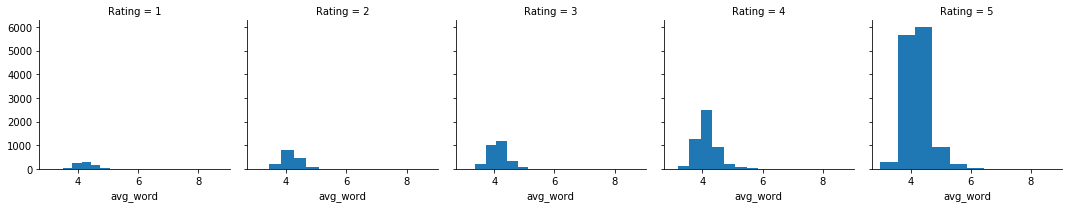

In [42]:
g = sns.FacetGrid(rev, col="Rating")
g.map(plt.hist, "avg_word")

The basic pre-processing steps in order to clean our data:

In [43]:
# First, remove of Stop Words
stop = stopwords.words('english')
rev['RT_new'] = rev_new['Review Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
rev['stopwords_len'] = rev_new['Review Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
rev[['Review Text', 'RT_new', 'stopwords_len']].tail(10)

,Review Text,RT_new,stopwords_len
23476,These bottoms are very cute but defiantly chee...,These bottoms cute defiantly cheeky! would rec...,10.0
23477,I'm so impressed with the beautiful color comb...,I'm impressed beautiful color combinations emb...,35.0
23478,I was surprised at the positive reviews for th...,I surprised positive reviews product. terrible...,22.0
23479,So i wasn't sure about ordering this skirt bec...,So sure ordering skirt see person first i'm gl...,48.0
23480,NaN,NaN,NaN
23481,I was very happy to snag this dress at such a ...,I happy snag dress great price! easy slip flat...,16.0
23482,"It reminds me of maternity clothes. soft, stre...","It reminds maternity clothes. soft, stretchy, ...",13.0
23483,"This fit well, but the top was very see throug...","This fit well, top see through. never would wo...",21.0
23484,I bought this dress for a wedding i have this ...,"I bought dress wedding summer, cute. unfortuna...",46.0
23485,This dress in a lovely platinum is feminine an...,This dress lovely platinum feminine fits perfe...,6.0


In [44]:
# Remove Punctuation
rev['RT_new'] = rev['RT_new'].str.replace('[^\w\s]','')
rev['RT_new'].tail(10)

23476    These bottoms cute defiantly cheeky would reco...
23477    Im impressed beautiful color combinations embr...
23478    I surprised positive reviews product terrible ...
23479    So sure ordering skirt see person first im gla...
23480                                                  NaN
23481    I happy snag dress great price easy slip flatt...
23482    It reminds maternity clothes soft stretchy shi...
23483    This fit well top see through never would work...
23484    I bought dress wedding summer cute unfortunate...
23485    This dress lovely platinum feminine fits perfe...
Name: RT_new, dtype: object

In [45]:
#Filter out data removing the NaN values
rev_new = rev[rev['RT_new'].notnull()]
rev['RT_new'] = rev_new['RT_new'].apply(lambda x: " ".join(x.lower() for x in x.split()))
rev['RT_new'].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    i high hopes dress really wanted work me initi...
3    i love love love jumpsuit fun flirty fabulous ...
4    this shirt flattering due adjustable front tie...
Name: RT_new, dtype: object

In [46]:
#Filter out data removing the NaN values
rev_new = rev[rev['RT_new'].notnull()]
# The most common word used
freq = pd.Series(' '.join(rev_new['RT_new']).split()).value_counts()[:10]
freq

dress    10460
i         9269
love      8916
size      8687
top       7323
fit       7238
like      6992
wear      6414
great     6076
im        5974
dtype: int64

I don't know if correct do this process. Is there something more automatically to select words like this???
is it better to remove the words most common and less common?

In [47]:
# remove specific words
#freq = ['I', 'im', 'it', 'this', 'would']
freq = list(freq.index)
rev['RT_new'] = rev_new['RT_new'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
rev['RT_new'].head()

0          absolutely wonderful silky sexy comfortable
1    sooo pretty happened find store glad bc never ...
2    high hopes really wanted work me initially ord...
3    jumpsuit fun flirty fabulous every time it get...
4    this shirt flattering due adjustable front tie...
Name: RT_new, dtype: object

In [48]:
#the most rare words
freq = pd.Series(' '.join(rev_new['RT_new']).split()).value_counts()[-10:]
freq

pillingshedding    1
pry                1
thum               1
thisits            1
zed                1
adjustableit       1
ornamental         1
ultracomfort       1
toplove            1
perfectlyso        1
dtype: int64

In [49]:
#Filter out data removing the NaN values
rev_new = rev[rev['RT_new'].notnull()]

freq = list(freq.index)
rev['RT_new'] = rev_new['RT_new'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
rev['RT_new'].head()

0          absolutely wonderful silky sexy comfortable
1    sooo pretty happened find store glad bc never ...
2    high hopes really wanted work me initially ord...
3    jumpsuit fun flirty fabulous every time it get...
4    this shirt flattering due adjustable front tie...
Name: RT_new, dtype: object

In [62]:
#Filter out data removing the NaN values
rev_new = rev[rev['RT_new'].notnull()]
# The most common word used
freq_yes = pd.Series(' '.join(rev_new['RT_new']).split()).value_counts()[:10]
print (freq_yes)

#the most rare words
freq_neg = pd.Series(' '.join(rev_new['RT_new']).split()).value_counts()[-10:]
print (freq_neg)

color      6903
look       6873
it         5406
would      5010
this       4954
fabric     4844
small      4564
really     3921
ordered    3831
little     3771
dtype: int64
1perfect               1
lightercolored         1
orangewhitebrownred    1
interpretation         1
simplifie              1
plusfor                1
tankeveryone           1
skew                   1
sholulder              1
vulnerable             1
dtype: int64


#### I don't like the result!

In [51]:
#Tokenization
from textblob import TextBlob
TextBlob(rev_new['RT_new'][1]).words

WordList(['sooo', 'pretty', 'happened', 'find', 'store', 'glad', 'bc', 'never', 'would', 'ordered', 'online', 'bc', 'petite', 'bought', 'petite', '58', 'length', 'me', 'hits', 'little', 'knee', 'would', 'definitely', 'true', 'midi', 'someone', 'truly', 'petite'])

In [52]:
print (rev[['Review Text','RT_new']].head())

                                         Review Text  \
0  Absolutely wonderful - silky and sexy and comf...   
1  Love this dress!  it's sooo pretty.  i happene...   
2  I had such high hopes for this dress and reall...   
3  I love, love, love this jumpsuit. it's fun, fl...   
4  This shirt is very flattering to all due to th...   

                                              RT_new  
0        absolutely wonderful silky sexy comfortable  
1  sooo pretty happened find store glad bc never ...  
2  high hopes really wanted work me initially ord...  
3  jumpsuit fun flirty fabulous every time it get...  
4  this shirt flattering due adjustable front tie...  


In [56]:
#Lemmatization
from textblob import Word
rev_new = rev[rev['RT_new'].notnull()]
rev['RT_new'] = rev_new['RT_new'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
rev['RT_new'].head()

0          absolutely wonderful silky sexy comfortable
1    sooo pretty happened find store glad bc never ...
2    high hope really wanted work me initially orde...
3    jumpsuit fun flirty fabulous every time it get...
4    this shirt flattering due adjustable front tie...
Name: RT_new, dtype: object

Advance Text Processing: extracting features using NLP techniques

In [57]:
# extract bigrams from our reviews using the ngrams function of the textblob library
TextBlob(rev['RT_new'][0]).ngrams(2)

[WordList(['absolutely', 'wonderful']),
 WordList(['wonderful', 'silky']),
 WordList(['silky', 'sexy']),
 WordList(['sexy', 'comfortable'])]

### TF

In [58]:
#Term frequency
tf1 = (rev['RT_new'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,petite,3
1,would,2
2,bc,2
3,hit,1
4,never,1
5,true,1
6,happened,1
7,truly,1
8,online,1
9,little,1


### IDF

In [60]:
rev_new = rev[rev['RT_new'].notnull()]
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(rev_new.shape[0]/(len(rev_new[rev_new['RT_new'].str.contains(word)])))

tf1

,words,tf,idf
0,petite,3,2.449884
1,would,2,1.644313
2,bc,2,4.984093
3,hit,1,2.370235
4,never,1,3.918270
5,true,1,2.614150
6,happened,1,5.808010
7,truly,1,4.903554
8,online,1,2.682799
9,little,1,1.928875


### TF-IDF

In [61]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,petite,3,2.449884,7.349652
1,would,2,1.644313,3.288626
2,bc,2,4.984093,9.968185
3,hit,1,2.370235,2.370235
4,never,1,3.918270,3.918270
5,true,1,2.614150,2.614150
6,happened,1,5.808010,5.808010
7,truly,1,4.903554,4.903554
8,online,1,2.682799,2.682799
9,little,1,1.928875,1.928875
